# Section one of the question

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
#pip -q install lxml

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

page = requests.get(url)

soup = BeautifulSoup(page.text,'lxml')
table = soup.find("table", {"class":'wikitable sortable'})
table_rows = table.find_all('tr')

rows = []

df = pd.DataFrame(columns=['PostalCode', 'Borough', 'Neighborhood'])

for tr in table_rows:
    td = tr.find_all('td')
    list = [i.text.replace('\n','').strip() for i in td]
    rows.append(list)
    
rows.pop(0)

for i in range(len(rows)):
    df.loc[i]= rows[i]
    
    
#df.head()
#df.shape




In [3]:
nan_value = float("NaN")

df.replace("Not assigned", nan_value, inplace=True)
df.dropna(subset = ["Borough"], inplace=True)
df.reset_index(drop=True, inplace=True)
df_sorted = df.sort_values('PostalCode')
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head(12)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [4]:
df_sorted.shape

(103, 3)

In [5]:
url_csv='http://cocl.us/Geospatial_data'
data = pd.read_csv(url_csv)
#data.head()
data.shape

(103, 3)

In [6]:
data.sort_values('Postal Code', inplace=True)

In [7]:
data_filtered = data[['Latitude', 'Longitude']]

In [8]:
df_new = df_sorted.join(data_filtered)

In [ ]:
df_new.head(10)

In [120]:
df_new.to_csv('df_new.csv')

In [107]:
df_new.shape
neigh_per_boro = df_new.groupby(['Borough'])['Neighborhood'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)


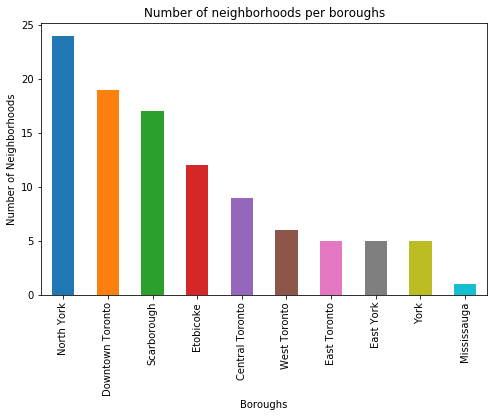

In [109]:
#neigh_per_boro.set_index('Borough', inplace=True)
#neigh_per_boro.head()
neigh_per_boro['count'].plot(kind='bar', figsize=(8, 5))

plt.title('Number of neighborhoods per boroughs') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Boroughs') # add x-label
#plt.legend('Counts')
plt.show()

In [ ]:
pip -q install folium

In [10]:
#pip -q install geopy
pip install pip --upgrade

SyntaxError: invalid syntax (<ipython-input-10-0619bc70ee84>, line 2)

# At this stage we try to find number of Mediteranean Restaurants in Toronto

In [11]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install foliom
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### making a map of Toronto

In [87]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_new['Latitude'], df_new['Longitude'], df_new['Borough'], df_new['Neighborhood']):

    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

In [14]:
CLIENT_ID = 'NUJDYNVPQZ1A5XI5H2BHPWSHFG4J4TEI41NTKQD05U3RKTSZ' # your Foursquare ID
CLIENT_SECRET = 'SARA0TKEAPSX4AMD4ZELS2JM1HCMEAHNJ5TAPR35FWGQMIIJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

## Creating Mediteranean Restaurants dataset

In [ ]:
address = 'Downtown Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

In [ ]:
# create map of Downtown Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
#map_toronto

In [69]:
#downtown_data.loc[0, 'Neighborhood']

pip -q install wget

SyntaxError: invalid syntax (<ipython-input-69-894cd6068aac>, line 3)

In [29]:

neighborhood_latitude = df_new.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_new.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_new.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
                                                               



Latitude and longitude values of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


In [30]:
# type your answer here

LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=NUJDYNVPQZ1A5XI5H2BHPWSHFG4J4TEI41NTKQD05U3RKTSZ&client_secret=SARA0TKEAPSX4AMD4ZELS2JM1HCMEAHNJ5TAPR35FWGQMIIJ&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [17]:
venue_id= '4e0e43f3fa76d62f444738eb'
url2 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
    venue_id,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION
    )
url2

'https://api.foursquare.com/v2/venues/4e0e43f3fa76d62f444738eb?&client_id=NUJDYNVPQZ1A5XI5H2BHPWSHFG4J4TEI41NTKQD05U3RKTSZ&client_secret=SARA0TKEAPSX4AMD4ZELS2JM1HCMEAHNJ5TAPR35FWGQMIIJ&v=20180605'

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
from pandas.io.json import json_normalize

In [35]:
results = requests.get(url).json()
results


[{'reasons': {'count': 0,
   'items': [{'reasonName': 'globalInteractionReason',
     'summary': 'This spot is popular',
     'type': 'general'}]},
  'referralId': 'e-0-4bb6b9446edc76b0d771311c-0',
  'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
      'suffix': '.png'},
     'id': '4bf58dd8d48988d16e941735',
     'name': 'Fast Food Restaurant',
     'pluralName': 'Fast Food Restaurants',
     'primary': True,
     'shortName': 'Fast Food'}],
   'id': '4bb6b9446edc76b0d771311c',
   'location': {'cc': 'CA',
    'city': 'Toronto',
    'country': 'Canada',
    'crossStreet': 'Morningside & Sheppard',
    'distance': 387,
    'formattedAddress': ['Toronto ON', 'Canada'],
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.80744841934756,
      'lng': -79.19905558052072}],
    'lat': 43.80744841934756,
    'lng': -79.19905558052072,
    'state': 'ON'},
   'name': 'Wendy’s',
   'photos': {'count': 0, 'groups': []}}},
 {'reasons':

In [22]:
#rate=results['response']['venue']['rating']
price=results['response']['venue']['price']['tier']
price
#rate

2

In [47]:
venue_id_table = med_rest[['Vennue ID']]
venue_list=[]
for i in range(len(venue_id_table['Vennue ID'])):
            
        # create the API request URL
        url3 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
             venue_id_table.loc[i, 'Vennue ID'],
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION)
        #print(venue_id_table.loc[i, 'Vennue ID'])    
        # make the GET request
        result = requests.get(url3).json()#["response"]['venue']['rating']
        #rating = result['response']['venue']['rating']
       # price  = result['response']['venue']['price']['tier']
        try:
            venue_list.append([venue_id_table.loc[i, 'Vennue ID'], result['response']['venue']['rating'], result['response']['venue']['price']['tier']])
       
        except: 
            venue_list.append([venue_id_table.loc[i, 'Vennue ID'],"nan", result['response']['venue']['price']['tier']])
        
#venue_list

In [48]:
#column={'Venue ID','Rating','Price Category'}
rating_venues = pd.DataFrame(venue_list)
rating_venues.columns = ['Venue ID', 'Rating', 'Price Category']
    
rating_venues.head()

,Venue ID,Rating,Price Category
0,4e0e43f3fa76d62f444738eb,nan,2
1,4b5a2bf2f964a520deb128e3,7.9,2
2,5331a799498e3bfbae4a5a04,nan,2
3,4bb628fbef159c74e18075f7,6.7,2
4,4bdaff7463c5c9b67bcb2568,8.2,2


In [122]:
med_rest['Venue Rating'] = rating_venues['Rating']
med_rest['Price Category'] = rating_venues['Price Category']
med_rest.to_csv('data_rating.csv')
med_rest.head(10)

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Vennue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Rating,Price Category
0,Scarborough,"Wexford, Maryvale",43.750072,-79.295849,4e0e43f3fa76d62f444738eb,Sequoia Lounge,43.745645,-79.295737,Middle Eastern Restaurant,nan,2
1,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,4b5a2bf2f964a520deb128e3,Remezzo Italian Bistro,43.778649,-79.308264,Italian Restaurant,7.9,2
2,North York,Hillcrest Village,43.803762,-79.363452,5331a799498e3bfbae4a5a04,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant,nan,2
3,North York,Willowdale,43.770120,-79.408493,4bb628fbef159c74e18075f7,Shawarma Max,43.766012,-79.410844,Middle Eastern Restaurant,6.7,2
4,North York,Don Mills,43.725900,-79.340923,4bdaff7463c5c9b67bcb2568,Sorento Restaurant,43.726575,-79.341989,Italian Restaurant,8.2,2
5,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,4bc3acbdabf495210a22c493,Orly Restaurant & Grill,43.754493,-79.443507,Middle Eastern Restaurant,7.3,2
6,North York,"Northwood Park, York University",43.767980,-79.487262,4e54345862e1d184431bc92b,Falafel Express,43.764187,-79.489121,Falafel Restaurant,nan,1
7,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4bce4183ef10952197da8386,Pantheon,43.677621,-79.351434,Greek Restaurant,8.6,2
8,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4e3dbb5e45dd68e3273e03b7,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant,8.7,2
9,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4afdfadff964a520a52c22e3,Mezes,43.677962,-79.350196,Greek Restaurant,8.1,2


In [52]:
#rating_venues = pd.DataFrame([item for venu_list in venue_list for item in venu_list])
#rating_venues.columns = ['Venue ID','Rating','Price Category']
med_rest_clean = med_rest.replace("nan", nan_value)
med_rest_clean.dropna(subset = ["Venue Rating"], inplace=True)
med_rest_clean.reset_index(drop=True, inplace=True)
med_rest_clean.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Vennue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Rating,Price Category
0,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,4b5a2bf2f964a520deb128e3,Remezzo Italian Bistro,43.778649,-79.308264,Italian Restaurant,7.9,2
1,North York,Willowdale,43.770120,-79.408493,4bb628fbef159c74e18075f7,Shawarma Max,43.766012,-79.410844,Middle Eastern Restaurant,6.7,2
2,North York,Don Mills,43.725900,-79.340923,4bdaff7463c5c9b67bcb2568,Sorento Restaurant,43.726575,-79.341989,Italian Restaurant,8.2,2
3,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,4bc3acbdabf495210a22c493,Orly Restaurant & Grill,43.754493,-79.443507,Middle Eastern Restaurant,7.3,2
4,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4bce4183ef10952197da8386,Pantheon,43.677621,-79.351434,Greek Restaurant,8.6,2


In [59]:
dara=med_rest_clean.groupby(['Borough'])['Venue Rating'].mean()
med_rest_avg_rating= dara.reset_index(name='Rating Mean').sort_values(['Rating Mean'], ascending=False)
med_rest_avg_rating.reset_index(drop=True, inplace=True)
med_rest_avg_rating.head()

,Borough,Rating Mean
0,West Toronto,8.266667
1,Scarborough,7.900000
2,Downtown Toronto,7.702381
3,East Toronto,7.700000
4,Central Toronto,7.225000


In [64]:
# download countries geojson file
#!wget --quiet https://cocl.us/toronto_geojson
!wget  https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/toronto.geojson   
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [83]:
world_geo = r'C:\Users\Dara\Desktop\projects\toronto.geojson' # geojson file
#world_geo = r'http://localhost:8888/edit/Desktop/projects/toronto.geojson.txt'
world_geo

'C:\\Users\\Dara\\Desktop\\projects\\toronto.geojson'

In [88]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto .choropleth(
    geo_data=world_geo,
    data=med_rest_avg_rating,
    columns=['Borough', 'Rating Mean'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating of Mediterranean Restaurants'
)

# display map
map_toronto

In [93]:
import matplotlib.pyplot as plt
med_rest_avg_rating.set_index('Borough', inplace=True)

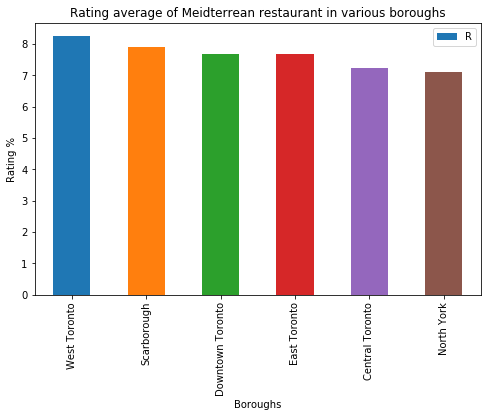

In [95]:
med_rest_avg_rating['Rating Mean'].plot(kind='bar', figsize=(8, 5))

plt.title('Rating average of Meidterrean restaurant in various boroughs') # add a title to the histogram
plt.ylabel('Rating %') # add y-label
plt.xlabel('Boroughs') # add x-label
plt.legend('Rating')
plt.show()

In [ ]:
'''
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)
#nearby_venues.shape
'''

In [38]:
def getNearbyVenues(boro, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for boro, name, lat, lng in zip(boro, names, latitudes, longitudes):
        #print(name)
        print(boro)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            pass
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            boro,
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Vennue ID',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
# type your answer here

toronto_venues = getNearbyVenues(boro=df_new['Borough'],names=df_new['Neighborhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )


Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
East York
East York
East Toronto
East York
East York
East York
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
Central Toronto
Central Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
North York
York
York
Downtown Toronto
Wes

In [123]:
print(toronto_venues.shape)
toronto_venues.head()

(2128, 9)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Vennue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4bb6b9446edc76b0d771311c,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Scarborough,"Malvern, Rouge",43.806686,-79.194353,5539e7d2498edaf4b02673ca,Interprovincial Group,43.805630,-79.200378,Print Shop
2,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4c23d3aaf7ced13a5ed7216d,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,5898005b76b8b25854c36663,Affordable Toronto Movers,43.787919,-79.162977,Moving Target
4,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4beee041e24d20a1cd857314,RBC Royal Bank,43.766790,-79.191151,Bank


In [41]:
#downtown_venues[['Venue Category']]
print('There are {} uniques categories in Toronto.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories in Toronto.


In [ ]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
col_name="Neighborhood"
first_col = toronto_onehot.pop(col_name)
toronto_onehot.insert(0, col_name, first_col)
# move neighborhood column to the first column
#fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
#downtown_onehot = downtown_onehot[fixed_columns]

#toronto_onehot.head(5)
#downtown_venues.head()

In [133]:
popu_venues = toronto_venues.groupby(['Venue Category'])['Neighborhood'].count().reset_index(name='count').sort_values(['count'], ascending=False)
popu_venues.reset_index(drop=True)
popu_venues.set_index('Venue Category', inplace=True)
popu_venues= popu_venues.head(10)

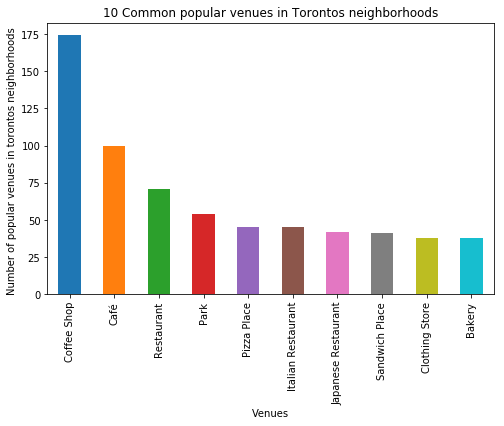

In [135]:
popu_venues['count'].plot(kind='bar', figsize=(8, 5))

plt.title('10 Common popular venues in Torontos neighborhoods' ) # add a title to the histogram
plt.ylabel('Number of popular venues in torontos neighborhoods ') # add y-label
plt.xlabel('Venues') # add x-label
#plt.legend('Counts')
plt.show()

In [ ]:
#for col in toronto_onehot.columns: 
#    print(col) 
#med_rest.shape

In [125]:
#is_data= toronto_onehot['Mediterranean Restaurant'] == 1
med_rest = toronto_venues[(toronto_venues['Venue Category'] == 'Mediterranean Restaurant') |  (toronto_venues['Venue Category'] == 'Turkish Restaurant') | (toronto_venues['Venue Category'] == 'Falafel Restaurant') | (toronto_venues['Venue Category'] == 'Doner Restaurant') | (toronto_venues['Venue Category'] == 'Greek Restaurant') | (toronto_venues['Venue Category'] == 'Italian Restaurant') | (toronto_venues['Venue Category'] == 'Middle Eastern Restaurant')].reset_index(drop=True)
#toronto_mrest= toronto_venues[is_data]
#toronto_mrest[['Mediterranean Restaurant', 'Neighborhood']]
med_rest.shape
#med_rest.to_csv('med_rest.csv')
#med_rest.head(10)

(82, 9)

In [116]:
rest_boro= med_rest.groupby(['Borough'])['Neighborhood'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
rest_boro.reset_index(drop=True)
rest_boro.set_index('Borough', inplace=True)
rest_boro.head(10)

,count
Borough,
Downtown Toronto,42
East Toronto,15
West Toronto,9
North York,8
Central Toronto,4
Mississauga,2
Scarborough,2


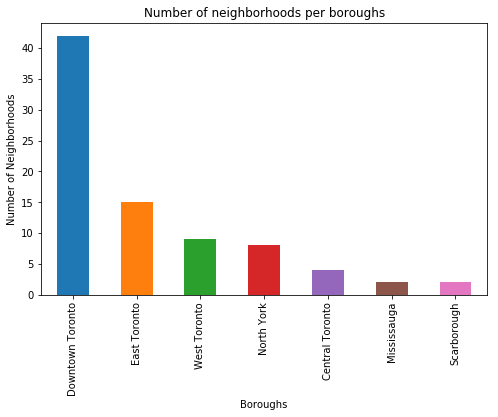

In [126]:
rest_boro['count'].plot(kind='bar', figsize=(8, 5))

plt.title('Number of neighborhoods per boroughs') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Boroughs') # add x-label
#plt.legend('Counts')
plt.show()

In [114]:
rest_neigh= med_rest.groupby(['Neighborhood'])['Venue'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
rest_neigh.reset_index(drop=True)
rest_neigh.set_index('Neighborhood', inplace=True)
rest_neigh.head()

,count
Neighborhood,
"The Danforth West, Riverdale",12
"Garden District, Ryerson",6
Central Bay Street,6
"Toronto Dominion Centre, Design Exchange",4
"Commerce Court, Victoria Hotel",3


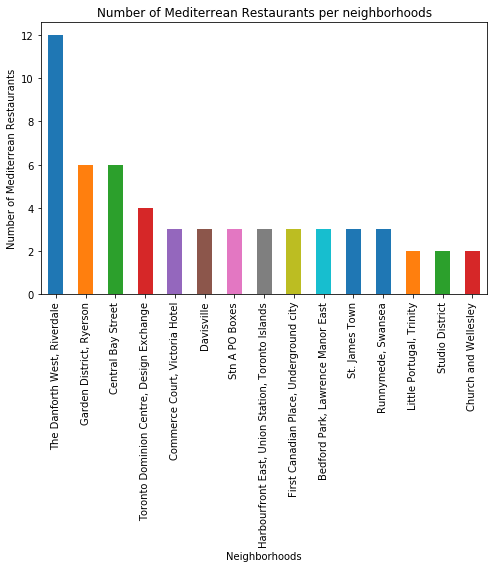

In [118]:
rest_neigh['count'].plot(kind='bar', figsize=(8, 5))

plt.title('Number of Mediterrean Restaurants per neighborhoods') # add a title to the histogram
plt.ylabel('Number of Mediterrean Restaurants') # add y-label
plt.xlabel('Neighborhoods') # add x-label
#plt.legend('Counts')
plt.show()

In [46]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(med_rest['Venue Latitude'], med_rest['Venue Longitude'], med_rest['Borough'], med_rest['Venue']):

    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=False,
        #fill_color='#3186cc',
        #fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

In [ ]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()

In [ ]:
#downtown_grouped.head()

In [ ]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
   # print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
   # print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
   # print('\n')

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

In [ ]:
# set number of clusters
kclusters = 10

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters